<a href="https://colab.research.google.com/github/chefdarek/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Loading, cleaning, visualizing, and analyzing data
look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year



In [6]:

!pip install pandas==0.23.4


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

In [9]:
print(df.isna().sum().sort_values(ascending=False))
print(df.shape)
print(df.describe())
print(df.head())
print(df.keys())


3    0
2    0
1    0
0    0
dtype: int64
(306, 4)
                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000
    0   1  2  3
0  30  64  1  1
1  30  62  3  1
2  30  65  0  1
3  31  59  2  1
4  31  65  4  1
Int64Index([0, 1, 2, 3], dtype='int64')


In [10]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [ ]:
df.columns = ['patient_age', 'op_yr', 'pos_aux_nodes', 'survival']

In [ ]:
status = {1: 1, 2: 0}
df['survival'] = df['survival'].map(status)

In [13]:
df['survival'].value_counts()

1    225
0     81
Name: survival, dtype: int64

In [14]:
df.head()

,patient_age,op_yr,pos_aux_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


 Examine the distribution and relationships of the features

In [ ]:
df['op_yr'].value_counts()

In [ ]:
df['pos_aux_nodes'].value_counts()

In [ ]:
df['patient_age'].dtype

In [ ]:
age_bin = pd.cut(df['patient_age'], 5)
df['age_bin']= age_bin
node_bin = pd.cut(df['pos_aux_nodes'], 5)
op_bin = pd.cut(df['op_yr'], 5)

In [ ]:
pd.crosstab(df['op_yr'],age_bin)
pd.crosstab(df['op_yr'],age_bin, normalize='columns')

In [60]:
pd.crosstab(df['survival'],[df['pos_aux_nodes'], age_bin])

pos_aux_nodes             0                                          \
patient_age   (29.947, 40.6] (40.6, 51.2] (51.2, 61.8] (61.8, 72.4]   
survival                                                              
0                          2           10            2            5   
1                         17           30           34           32   

pos_aux_nodes                          1                             \
patient_age   (72.4, 83.0] (29.947, 40.6] (40.6, 51.2] (51.2, 61.8]   
survival                                                              
0                        0              0            2            3   
1                        4              5           13           12   

pos_aux_nodes                                       2                \
patient_age   (61.8, 72.4] (72.4, 83.0] (29.947, 40.6] (40.6, 51.2]   
survival                                                              
0                        2            1              0            2   
1                        2            1              4            5   

pos_aux_nodes                                                    3   \
patient_age   (51.2, 61.8] (61.8, 72.4] (72.4, 83.0] (29.947, 40.6]   
survival                                                              
0                        1            1            1              0   
1                        4            2            0              2   

pos_aux_nodes                                                      \
patient_age   (40.6, 51.2] (51.2, 61.8] (61.8, 72.4] (72.4, 83.0]   
survival                                                            
0                        2            4            0            1   
1                        4            5            1            1   

pos_aux_nodes             4                                          \
patient_age   (29.947, 40.6] (40.6, 51.2] (51.2, 61.8] (61.8, 72.4]   
survival                                                              
0                          0            0            2            1   
1                          2            5            3            0   

pos_aux_nodes             5                                        6   \
patient_age   (29.947, 40.6] (40.6, 51.2] (51.2, 61.8] (29.947, 40.6]   
survival                                                                
0                          0            1            3              0   
1                          1            0            1              1   

pos_aux_nodes                                                    7   \
patient_age   (40.6, 51.2] (51.2, 61.8] (61.8, 72.4] (29.947, 40.6]   
survival                                                              
0                        2            1            0              0   
1                        2            0            1              1   

pos_aux_nodes                                     8                \
patient_age   (40.6, 51.2] (51.2, 61.8] (40.6, 51.2] (51.2, 61.8]   
survival                                                            
0                        1            1            0            0   
1                        1            3            3            1   

pos_aux_nodes                          9                             \
patient_age   (61.8, 72.4] (29.947, 40.6] (40.6, 51.2] (51.2, 61.8]   
survival                                                              
0                        2              1            1            2   
1                        1              0            0            1   

pos_aux_nodes                          10                          11  \
patient_age   (61.8, 72.4] (29.947, 40.6] (40.6, 51.2] (29.947, 40.6]   
survival                                                                
0                        0              0            1              0   
1                        1              2            0              1   

pos_aux_nodes                                     12               \
patient_age   (

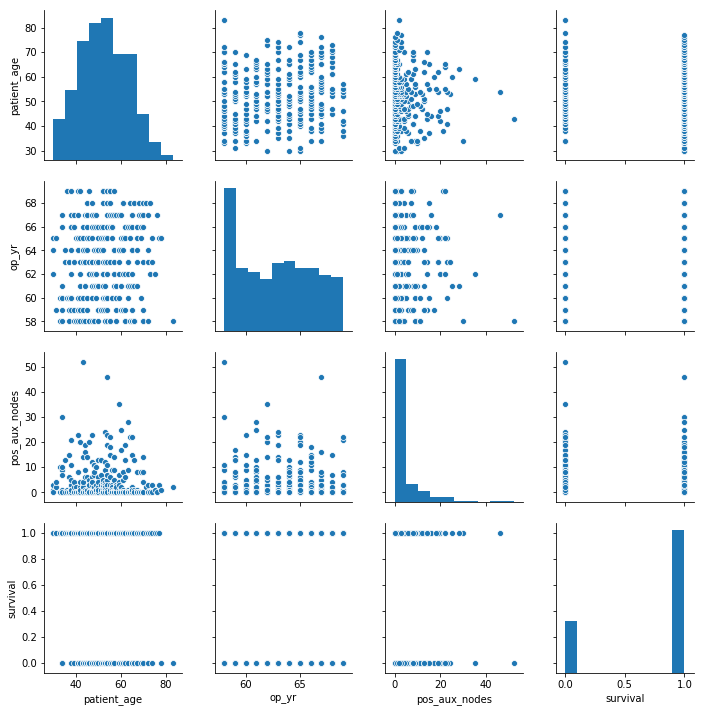

In [25]:
sns.pairplot(df);

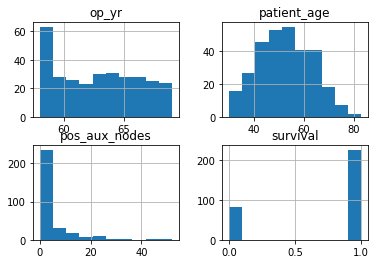

In [41]:
df.hist();

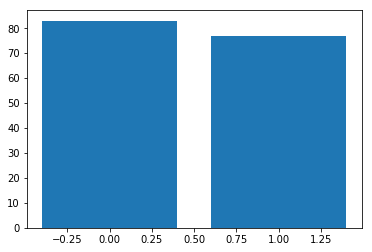

In [53]:
plt.bar(df['survival'], df['patient_age']);

In [ ]:
from scipy.stats import norm

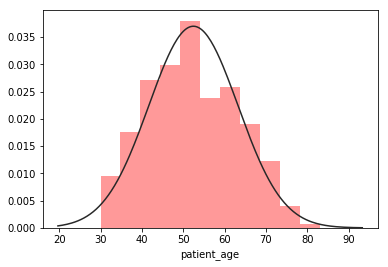

In [28]:
sns.set_color_codes()
ax = sns.distplot(df['patient_age'], color="red",fit=norm, kde=False);

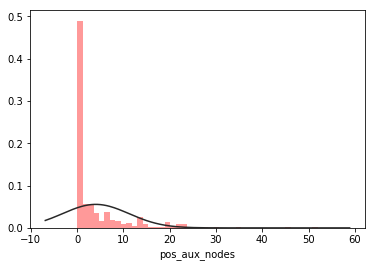

In [29]:
sns.set_color_codes()
ax = sns.distplot(df['pos_aux_nodes'], color="red",fit=norm, kde=False);

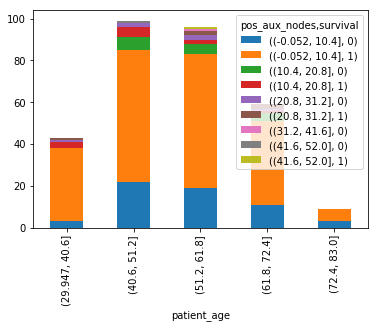

In [68]:
ct = pd.crosstab(age_bin,[node_bin, df['survival']])
ct.plot(kind='bar', stacked=True);


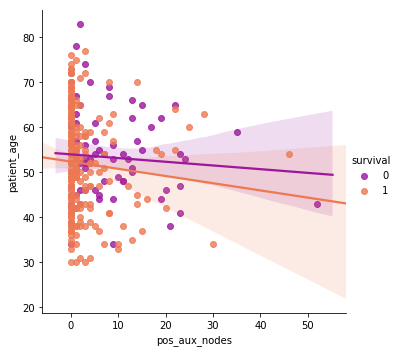

In [87]:
sns.lmplot(
    x='pos_aux_nodes', y='patient_age', data=df, 
    hue='survival', fit_reg=True, legend=True, 
    palette='plasma', robust=True,markers='o');


 Analysis and Interpretation


- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?


There is a postive relationship between the patients age and the number of positive auxillary nodes present towards the center denisty of the age range (fig1), however this trend negates as we pass the near median(fig2). This peak and reversal signals a resulting negative relationship.  
bold text

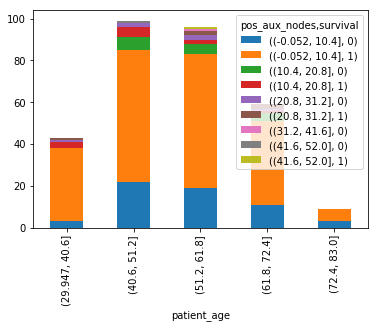

In [69]:
ct.plot(kind='bar', stacked=True);



Additonally it would appear from the information that the greatest chance of survival is correlated with median range. This appears to be a false correlation possibly due to instances of inforamation available for each age reported. While breast cancer tends to be considered a female mality this information lacks clarification on sex of the patient which could further confound the issue.

One reason there maybe a greater incidence of positive aux nodes present in testing of the median age group is due to lack of testing itself. By the time the test was performed on a patient they could have accumulated a greater number of positive markers because they did not get tested sooner.

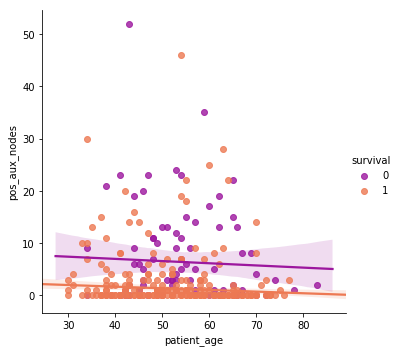

In [90]:
sns.lmplot(
    x='patient_age', y='pos_aux_nodes', data=df, 
    hue='survival',  legend=True, 
    palette='plasma', robust=True,markers='o');